# importing useful libraries

In [1]:
#Basic Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#for finding accuracy
from sklearn.metrics import accuracy_score
#sklearn useful library for Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_json('News_Category_Dataset.json',lines=True) #loading dataset

In [3]:
df.head() #5 row from start

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [4]:
print("news dataset has {} columns and {} rows".format(df.shape[1],df.shape[0]))

news dataset has 6 columns and 124989 rows


In [5]:
print('Columns = {}'.format(df.columns.values))

Columns = ['authors' 'category' 'date' 'headline' 'link' 'short_description']


# Data Preprocessing

Let's Create new column news by combining headling,short_description and authors because every news contain these features

In [6]:
df['news'] = df['headline']+df['short_description']+df['authors']

So in this dataset we'll generate category by news so there is no need of headline,short_description,date,link

In [7]:
from io import StringIO
col = ['category', 'news'] #useful columns
df = df[col]
df = df[pd.notnull(df['news'])] #removing null value if any
df.columns = ['category', 'news'] 
df['category_id'] = df['category'].factorize()[0] #creating category_id correspond to cattegory
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()

,category,news,category_id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,1


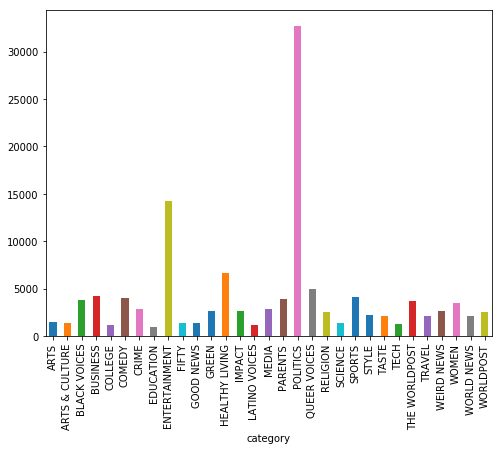

In [8]:
#Bar Plot of category by their count 
fig = plt.figure(figsize=(8,6))
df.groupby('category').news.count().plot.bar(ylim=0)
plt.show()

As we can see on the above bar plot that the politics and Entertainment occurence are high as compare to all

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['news'], df['category'], random_state = 0) #Splitting dataset into training and test set
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) #converting to X_train text to matrix of token count by CountVectorizer class 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Model Selection

# MultinomialNB

In [10]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))
print(accuracy_score(y_pred,y_test))

0.36155913978494625


# RandomForestClassifier

In [11]:

clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))
print(accuracy_score(y_pred,y_test))

0.2633768561187916


# LinearSVC

In [12]:
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))
print(accuracy_score(y_pred,y_test))

0.7040450588837686


# LogisticRegression

In [13]:
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))
print(accuracy_score(y_pred,y_test))

0.6154953917050692


# Evaluating and visualising all four models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
models_accuracy = {
    "model":[],
    "accuracy":[]
}
for model in models:
    model.fit(X_train_tfidf,y_train)
    y_pred = model.predict(count_vect.transform(X_test))
    models_accuracy['model'].append(model.__class__.__name__)
    models_accuracy['accuracy'].append(accuracy_score(y_pred,y_test))
accuracy = pd.DataFrame(models_accuracy)
accuracy

,model,accuracy
0,RandomForestClassifier,0.263377
1,LinearSVC,0.704045
2,MultinomialNB,0.361559
3,LogisticRegression,0.615495


In [15]:
accuracy.sort_values('accuracy',ascending=False)

,model,accuracy
1,LinearSVC,0.704045
3,LogisticRegression,0.615495
2,MultinomialNB,0.361559
0,RandomForestClassifier,0.263377


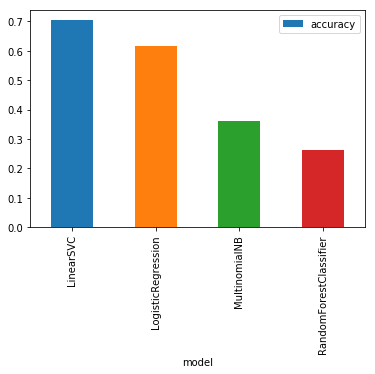

In [16]:
accuracy.sort_values('accuracy',ascending=False).plot.bar(x='model',y='accuracy')

As we can see above that the LinearSVC is giving best accuracy so we can use LinearSVC for our model prediction and its accuracy is approx 70